In [2]:
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib notebook

In [24]:
dt = np.dtype(np.int32).newbyteorder(">")

def get_max(d):
    """
    Max val
    """
    return np.max(d[1:])

def read_dat(id_num, module):
    """
    id
    module : fem or pam
    """
    data = {}
    norm_data = {}  # peak normalized
    for pol in ["north", "east"]:
        path = f"data/{module}/{module}{id_num}_{pol}.npz"
        d = np.frombuffer(np.load(path)["3"], dtype=dt).astype(float)
        norm_d = d / get_max(d)
        data[pol] = d
        norm_data[pol] = norm_d
    
    return data, norm_data

def all_data(id_nums, module):
    data = {}
    norm_data = {}
    for id_num in id_nums:
        d, nd = read_dat(id_num, module)
        data[id_num] = d
        norm_data[id_num] = nd
    return data, norm_data

In [30]:
def plot_data(data, id_nums):
    plt.figure()
    for id_num in id_nums:
        d = data[id_num]
        for pol in ["north", "east"]:
            plt.plot(d[pol], label=f"{id_num}: {pol}")
    plt.legend()
    plt.show()
    
def plot_norm(data, id_nums, ref_max):
    """
    data : dict, peak normalized data
    id_nums : list of str
    ref_max : float, value to set peak to
    """
    plt.figure()
    for id_num in id_nums:
        d = data[id_num]
        for pol in ["north", "east"]:
            plt.plot(d[pol] * ref_max, label=f"{id_num}: {pol}")
    plt.legend()
    #plt.ylim(0, 1e6)
    plt.show()

## FEMs
Fiber: 500m, A

PAM: 378, EAST input, attenuation: east = 9, north = 4

SNAP: C000091, E6 input

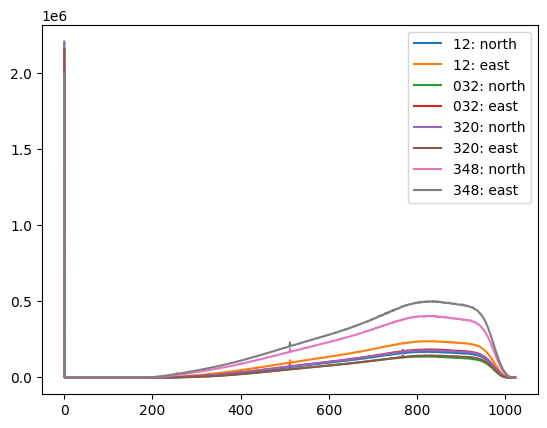

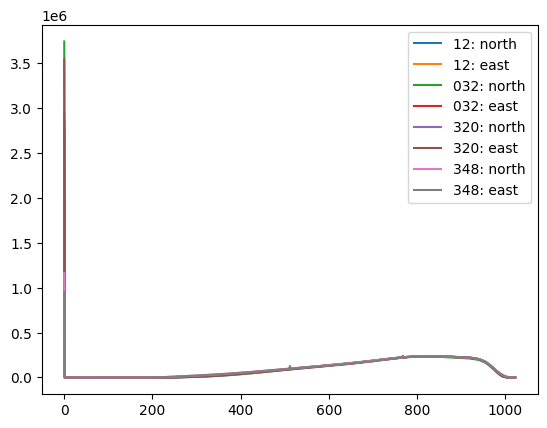

In [31]:
FEMS = ["12", "032", "320", "348"]
fem_data, fem_norm = all_data(FEMS, "fem")

plot_data(fem_data, FEMS)
plot_norm(fem_norm, FEMS, get_max(fem_data["12"]["east"]))

## PAMs

Fiber: 500m, A

FEM: 032, EAST input

PAM attenuation: east = 8, north = 8

SNAP: C000091, E6 input

In [32]:
PAMS = ["375", "376", "377", "378"]
pam_data, pam_norm = all_data(PAMS, "pam")

plot_data(pam_data, PAMS)
plot_norm(pam_norm, PAMS, get_max(pam_data["375"]["east"]))

FileNotFoundError: [Errno 2] No such file or directory: 'data/pam/pam375_north.npz'

In [5]:
FEMS = ["12", "032", "320", "348"]

def byte2int(fem_id):
    n_path = f"data/fem/fem{fem_id}_north.npz"
    e_path = f"data/fem/fem{fem_id}_east.npz"
    d_north = np.frombuffer(np.load(n_path)["3"], dtype=dt).astype(float)
    d_east = np.frombuffer(np.load(e_path)["3"], dtype=dt).astype(float)
    return np.array([d_north, d_east])

data = {}
for fem_id in FEMS:
    d = byte2int(fem_id)
    data[fem_id] = d
    
east_12_max = data["12"][1][1:].max()
    
peak_normalized_data = {}
for fem_id in data:
    d = data[fem_id]
    peak_normalized_data[fem_id] = d / np.max(d[:, 1:], axis=1, keepdims=True)
    
east_12_normalized = peak_normalized_data["12"][1]

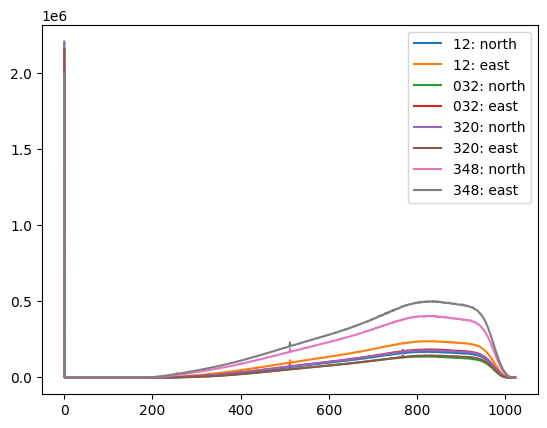

In [6]:
plt.figure()
for fem_id in FEMS:
    d = data[fem_id]
    plt.plot(d[0], label=f"{fem_id}: north")
    plt.plot(d[1], label=f"{fem_id}: east")
plt.legend()
plt.show()

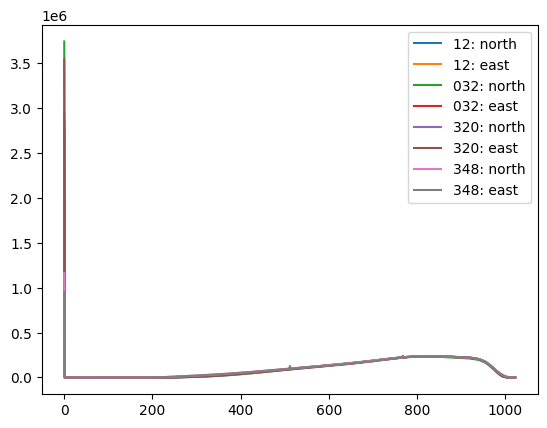

In [7]:
plt.figure()
for fem_id in FEMS:
    d = peak_normalized_data[fem_id]
    plt.plot(d[0] * east_12_max, label=f"{fem_id}: north")
    plt.plot(d[1] * east_12_max, label=f"{fem_id}: east")
plt.legend()
#plt.ylim(0, 1e6)
plt.show()

/tmp/ipykernel_9352/567449508.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(d[0] / east_12_normalized, label=f"{fem_id}: north")
/tmp/ipykernel_9352/567449508.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(d[1] / east_12_normalized, label=f"{fem_id}: east")
/tmp/ipykernel_9352/567449508.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(d[0] / east_12_normalized, label=f"{fem_id}: north")
/tmp/ipykernel_9352/567449508.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(d[1] / east_12_normalized, label=f"{fem_id}: east")


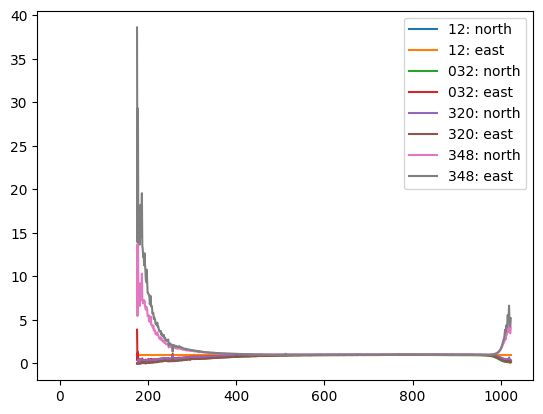

In [8]:
plt.figure()
for fem_id in FEMS:
    d = peak_normalized_data[fem_id]
    plt.plot(d[0] / east_12_normalized, label=f"{fem_id}: north")
    plt.plot(d[1] / east_12_normalized, label=f"{fem_id}: east")
plt.legend()
plt.show()

/tmp/ipykernel_9352/1403772209.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.diff(d[0]) / d[0][1:], label=f"{fem_id}: north")
/tmp/ipykernel_9352/1403772209.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.diff(d[0]) / d[0][1:], label=f"{fem_id}: north")
/tmp/ipykernel_9352/1403772209.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.diff(d[1]) / d[1][1:], label=f"{fem_id}: east")
/tmp/ipykernel_9352/1403772209.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.diff(d[1]) / d[1][1:], label=f"{fem_id}: east")


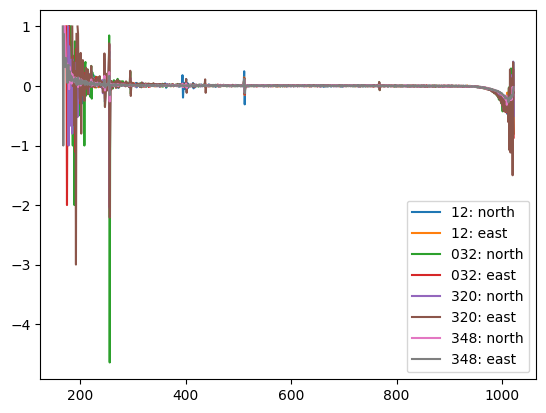

In [9]:
plt.figure()
for fem_id in FEMS:
    d = data[fem_id]
    plt.plot(np.diff(d[0]) / d[0][1:], label=f"{fem_id}: north")
    plt.plot(np.diff(d[1]) / d[1][1:], label=f"{fem_id}: east")
plt.legend()
plt.show()

## PAMs

Fiber: 500m

FEM: 032, EAST input

PAM attenuation: east = 8, north = 8

SNAP: C000091, E6 input

#### Note: PAM 292 i2c is not working, attenuation is unknown!

In [11]:
PAMS = ["376", "378"]
dt = np.dtype(np.int32).newbyteorder(">")

def byte2int(pam_id):
    n_path = f"data/pam/pam{pam_id}_north.npz"
    e_path = f"data/pam/pam{pam_id}_east.npz"
    d_north = np.frombuffer(np.load(n_path)["3"], dtype=dt).astype(float)
    d_east = np.frombuffer(np.load(e_path)["3"], dtype=dt).astype(float)
    return np.array([d_north, d_east])

data = {}
for pam_id in PAMS:
    d = byte2int(pam_id)
    data[pam_id] = d
    
east_378_max = data["378"][1][1:].max()
    
peak_normalized_data = {}
for pam_id in data:
    d = data[pam_id]
    peak_normalized_data[pam_id] = d / np.max(d[:, 1:], axis=1, keepdims=True)
    
east_378_normalized = peak_normalized_data["378"][1]

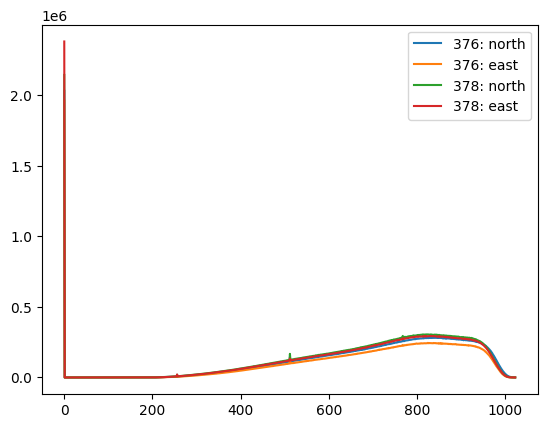

In [12]:
plt.figure()
for pam_id in PAMS:
    d = data[pam_id]
    plt.plot(d[0], label=f"{pam_id}: north")
    plt.plot(d[1], label=f"{pam_id}: east")
plt.legend()
plt.show()

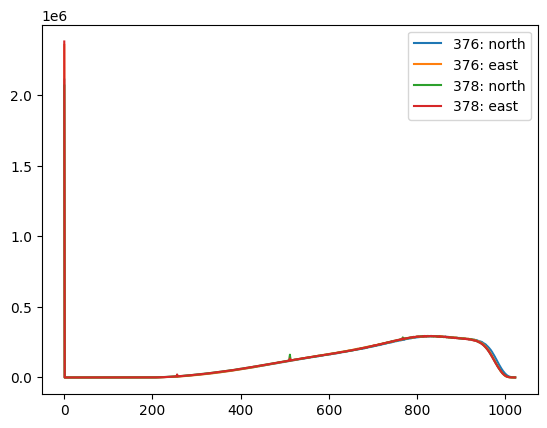

In [14]:
plt.figure()
for pam_id in PAMS:
    d = peak_normalized_data[pam_id]
    plt.plot(d[0] * east_378_max, label=f"{pam_id}: north")
    plt.plot(d[1] * east_378_max, label=f"{pam_id}: east")
plt.legend()
#plt.ylim(0, 1e6)
plt.show()

/tmp/ipykernel_9352/2857159990.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(d[0] / east_378_normalized, label=f"{pam_id}: north")
/tmp/ipykernel_9352/2857159990.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(d[1] / east_378_normalized, label=f"{pam_id}: east")
/tmp/ipykernel_9352/2857159990.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(d[0] / east_378_normalized, label=f"{pam_id}: north")


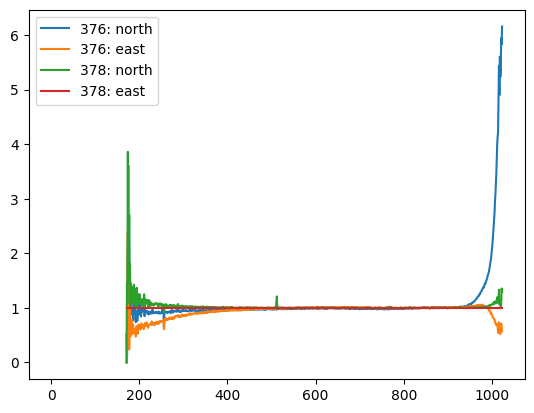

In [15]:
plt.figure()
for pam_id in PAMS:
    d = peak_normalized_data[pam_id]
    plt.plot(d[0] / east_378_normalized, label=f"{pam_id}: north")
    plt.plot(d[1] / east_378_normalized, label=f"{pam_id}: east")
plt.legend()
plt.show()

/tmp/ipykernel_9352/2820508969.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.diff(d[0]) / d[0][1:], label=f"{pam_id}: north")
/tmp/ipykernel_9352/2820508969.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.diff(d[0]) / d[0][1:], label=f"{pam_id}: north")
/tmp/ipykernel_9352/2820508969.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.diff(d[1]) / d[1][1:], label=f"{pam_id}: east")
/tmp/ipykernel_9352/2820508969.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.diff(d[1]) / d[1][1:], label=f"{pam_id}: east")


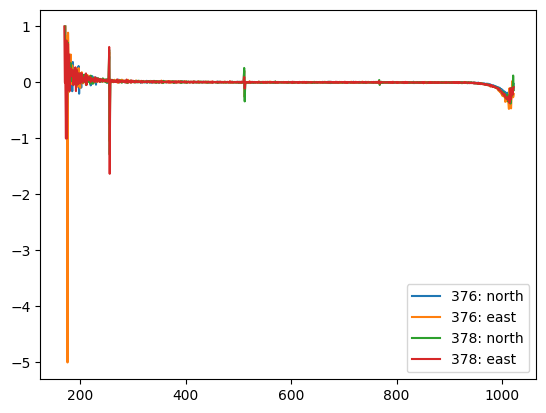

In [16]:
plt.figure()
for pam_id in PAMS:
    d = data[pam_id]
    plt.plot(np.diff(d[0]) / d[0][1:], label=f"{pam_id}: north")
    plt.plot(np.diff(d[1]) / d[1][1:], label=f"{pam_id}: east")
plt.legend()
plt.show()

## Fiber 

FEM: 032, EAST input

PAM 375, EAST input, attenuation = 8

SNAP: C000091, E6 input